
# Hotel Booking Analysis

## Import Libraries and Dependency

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [2]:
# Import libraries yang kita butuhkan
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## Data Wrangling

In [3]:
# Mounting ke google drive untuk mengakses dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Dataset diimport menggunakan pandas sebagai dataframe
# Direktori Kiara
df = pd.read_csv('/content/drive/MyDrive/Dataset/hotels.csv')

# Direktori Alviya
#df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/Dataset/hotels.csv')

In [5]:
#Memeriksa 5 data pertama pada dataset
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Memeriksa informasi keseluruhan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [8]:
# Memeriksa data yang memiliki duplikasi
duplicates = df.duplicated().sum()
print(f"Banyak kolom duplikat sebelum cleaning: {duplicates}")

Banyak kolom duplikat sebelum cleaning: 31994


In [9]:
# Menghapus data yang memiliki value duplikasi
df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [10]:
# Memeriksa kembali apakah data yang duplikat sudah terhapus
df.duplicated().sum()

31994

In [11]:
# Memeriksa apakah ada data null
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [12]:
numeric_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

In [13]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [14]:
print("\nPreview data clean:")
df.head()


Preview data clean:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.000000,0.000000,1.000000,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.000000,69.000000,160.000000,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.000000,2016.000000,2017.000000,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.000000,28.000000,38.000000,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.000000,16.000000,23.000000,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.000000,1.000000,2.000000,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.000000,2.000000,3.000000,50.0
adults,119390.0,1.856403,0.579261,0.00,2.000000,2.000000,2.000000,55.0
children,119390.0,0.103890,0.398555,0.00,0.000000,0.000000,0.000000,10.0
babies,119390.0,0.007949,0.097436,0.00,0.000000,0.000000,0.000000,10.0


In [16]:
df[categorical_columns]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


## Explanatory Data Analysis

In [17]:
palette = ['#ADD8E6', '#FFC0CB']

Pertama, kita akan menganalisa jumlah customer hotel berdasarkan masing-masing tipe customer

### Distribusi Tipe Customer

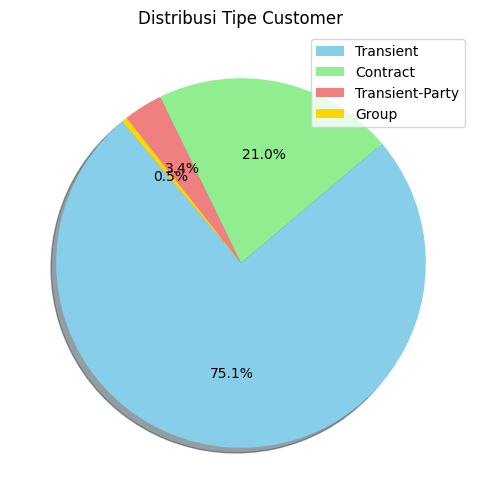

In [18]:
# Membuat variabel untuk menghitung jumlah customer
customer_type_counts = df['customer_type'].value_counts()

colors = {
    'Transient': 'skyblue',
    'Contract': 'lightcoral',
    'Transient-Party': 'lightgreen',
    'Group': 'gold'
}

labels = ['Transient', 'Contract', 'Transient-Party', 'Group']


# Visualisasi
plt.figure(figsize=(8, 6))
plt.pie(
    customer_type_counts.values,
    colors=[colors[key] for key in customer_type_counts.index],
    autopct='%1.1f%%',
    startangle=130,
    shadow=True
)

plt.title('Distribusi Tipe Customer')
plt.legend(labels)
plt.show()

Dari hasil visualisasi diatas, kita dapat melihat bahwa 75% dari total customer adalah tipe transient dan yang paling sedikit adalah tipe customer group

Selanjutnya, kita akan menganalisa dari negara mana saja customer yang menginap di hotel

In [19]:
origin_country = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
origin_country.columns = ['country', 'Number of guests']
origin_country

,country,Number of guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [20]:
fig = px.choropleth(origin_country ,locations=origin_country['country'], color=origin_country['Number of guests'], hover_name=origin_country['country'], title='Negara Asal Customer')
fig.show()

Dari map diatas, customer didominasi oleh customer yang berasal dari kawasan Eropa, khususnya berasal dari negara Portugis yang mencapai 21.492 customer.

### Status Reservasi

Selanjutnya, kita akan menganalisa variabel pembatalan reservasi pada kedua hotel.

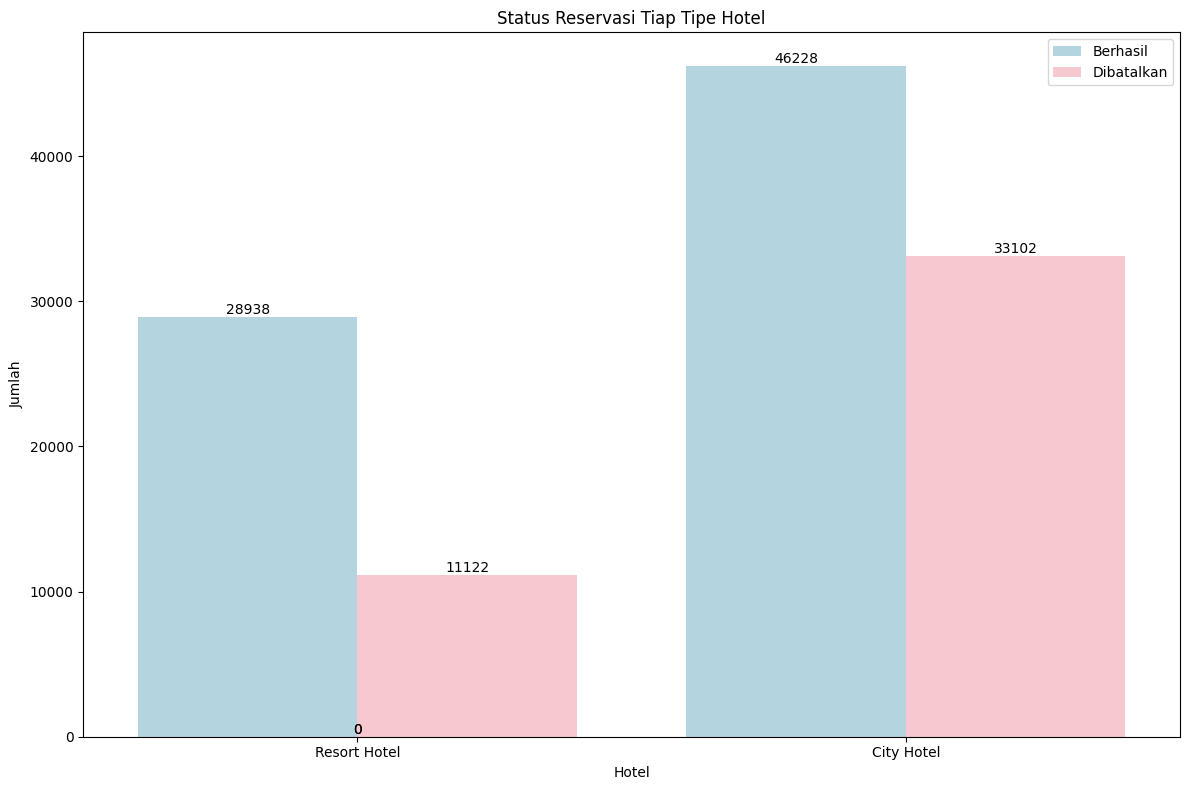

In [21]:
# Visualisasi
plt.figure(figsize=(12, 8))

# Membuat countplot
ax1 = sns.countplot(
    x='hotel',
    hue='is_canceled',
    data=df,
    palette={0: '#ADD8E6', 1: '#FFC0CB'}
)

# Menambahkan anotasi jumlah di atas setiap bar
for bar in ax1.patches:
    ax1.annotate(
        f'{int(bar.get_height())}',  # Mengambil tinggi bar sebagai jumlah
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Menempatkan posisi teks
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Menyesuaikan legenda dan label
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))
plt.title('Status Reservasi Tiap Tipe Hotel')
plt.xlabel('Hotel', color='Black')
plt.ylabel('Jumlah', color='Black')
plt.legend(['Berhasil', 'Dibatalkan'])

plt.tight_layout()
plt.show()


Dari hasil visualisasi kedua hotel tersebut, jumlah pembatalan tertinggi berada pada city hotel namun untuk reservasi yang terbanyak juga berada di City hotel. Dari informasi ini, kita dapat menganalisa dari tipe hotel manakah yang berkontribusi terhadap pendapatan hotel. Apakah city hotel karena tingginya jumlah reservasi? Atau malah resort hotel yang memiliki total pendapatan lebih banyak? Nanti, kita akan menganalisa pendapatan hotel di akhir.

Selanjutnya, kita akan menganalisa customer yang melakukan reservasi ulang

### Jumlah Customer Reservasi Ulang

Untuk mengetahui karakteristik pelanggan, kita akan menghitung berapakah pelanggan yang melakukan reservasi ulang pada kedua hotel.

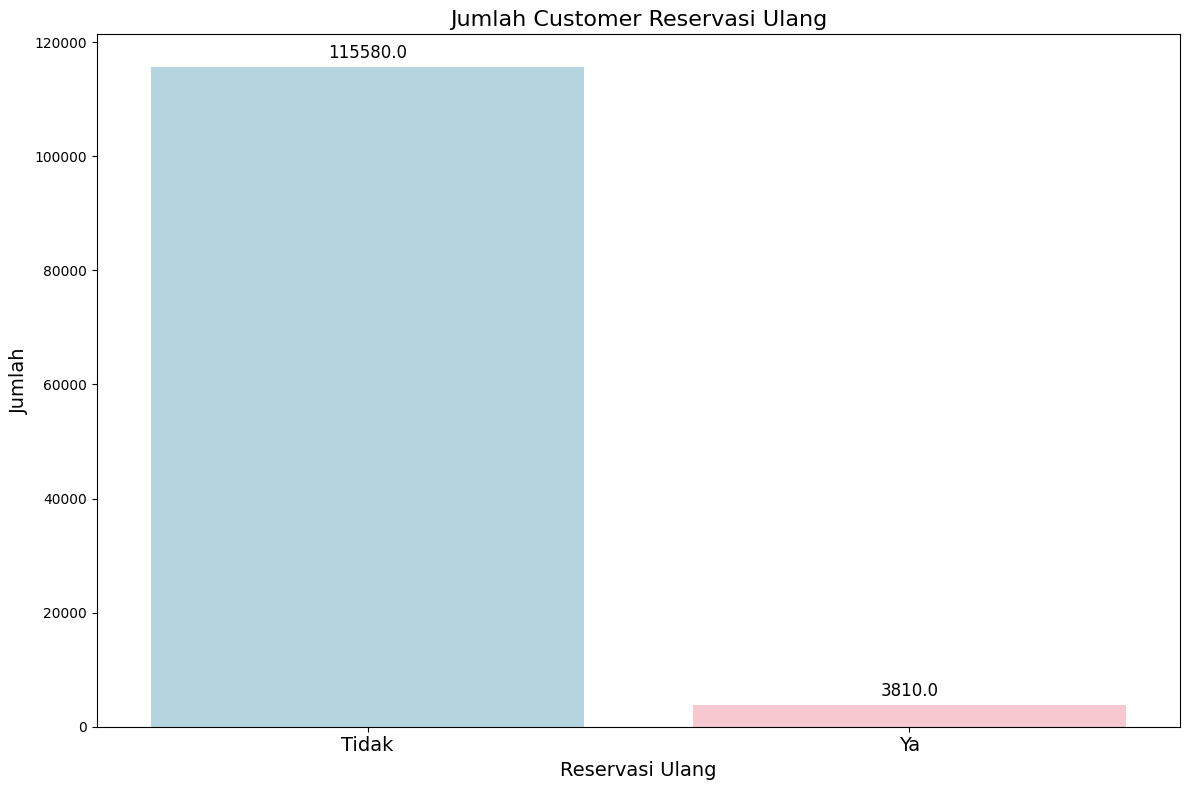

In [22]:
# Visualisasi Data
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='is_repeated_guest', palette=palette) # Menggunakan variabel is_repeates_guest sebagai sumbu x
ax.set_title('Jumlah Customer Reservasi Ulang', fontsize=16, color='black')
ax.set_xticklabels(['Tidak', 'Ya'], fontsize=14)
plt.xlabel('Reservasi Ulang', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.yticks(fontsize=10)

# Menambahkan anotasi pada masing - masing bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

Ternyata hanya 3.19% dari total customer 119.390 yang melakukan reservasi ulang :0

Mari kita lihat lebih detail banyaknya customer yang membatalkan reservasi setiap bulannya pada masing-masing tahun

In [23]:
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

Berdasarkan grafik di atas, kita dapat melihat fluktuasi yang cukup signifikan pada jumlah reservasi yang berhasil dan dibatalkan setiap bulannya. Terlihat bahwa bulan Juli mengalami puncak tertinggi pada jumlah reservasi yang berhasil, sementara bulan Januari mencatatkan jumlah reservasi yang berhasil paling rendah. Tren pembatalan reservasi juga menunjukkan pola yang menarik, dengan puncak pembatalan terjadi pada bulan-bulan tertentu. Fluktuasi ini kemungkinan besar dipengaruhi oleh berbagai faktor, seperti musim liburan, event khusus, atau bahkan perubahan kebijakan perusahaan. Secara keseluruhan, grafik ini memberikan gambaran yang jelas tentang kinerja reservasi sepanjang tahun dan dapat menjadi dasar untuk melakukan analisis lebih lanjut yaitu dengan membandingkan data ini dengan data tahun sebelumnya.

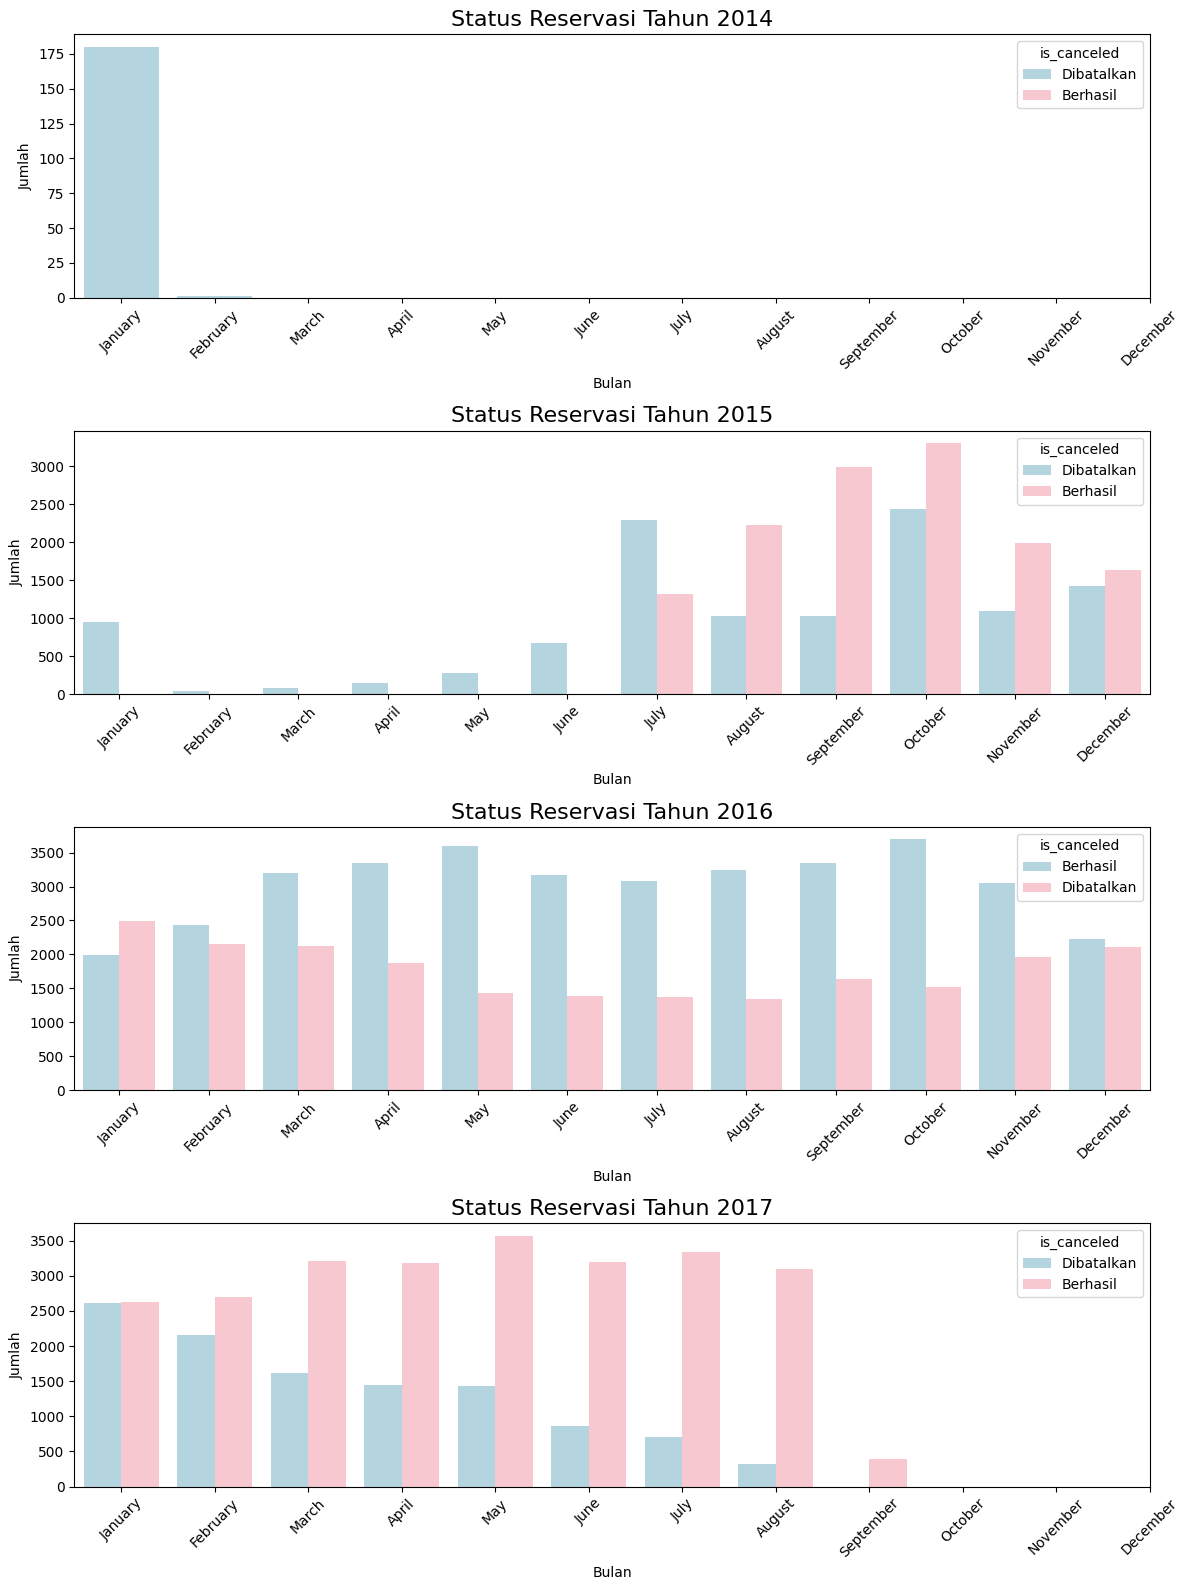

In [24]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['month'] = df['reservation_status_date'].dt.month
df['year'] = df['reservation_status_date'].dt.year
labelling = df['is_canceled'].map({0: 'Berhasil', 1: 'Dibatalkan'})

df_grouped = df.groupby('year')

# Buat figure dan axes
fig, axes = plt.subplots(nrows=len(df_grouped), ncols=1, figsize=(12, 4*len(df_grouped)))

# Iterasi setiap kelompok tahun
for i, (year, group) in enumerate(df_grouped):
    # Buat subplot
    ax = axes[i]

    # Buat countplot untuk setiap tahun
    sns.countplot(x='month', hue=labelling, data=group, palette=palette, ax=ax)

    # Sesuaikan label dan judul
    ax.set_title(f'Status Reservasi Tahun {year}', size=16)
    x=range(0,12)
    ax.set_xticks(x)
    ax.set_xticklabels(months_order, rotation=45)
    ax.set_xlabel('Bulan')
    ax.set_ylabel('Jumlah')

# Sesuaikan layout
plt.tight_layout()
plt.show()


Tahun 2014: Jumlah reservasi secara keseluruhan masih relatif rendah dibandingkan tahun-tahun berikutnya. Terdapat fluktuasi yang cukup signifikan dari bulan ke bulan, namun tidak ada tren yang sangat jelas.

Tahun 2015: Terjadi peningkatan yang signifikan pada jumlah reservasi dibandingkan tahun sebelumnya. Puncak reservasi terjadi pada bulan Juli, sementara tingkat pembatalan cenderung lebih stabil dibandingkan tahun 2014.

Tahun 2016: Jumlah reservasi terus meningkat dan mencapai puncaknya pada tahun ini. Fluktuasi musiman juga lebih terlihat jelas, dengan puncak reservasi terjadi pada bulan-bulan tertentu. Tingkat pembatalan juga cenderung lebih tinggi dibandingkan tahun sebelumnya.

Tahun 2017: Meskipun masih terdapat peningkatan jumlah reservasi, namun pertumbuhannya tidak secepat tahun sebelumnya. Tingkat pembatalan juga cenderung lebih tinggi, terutama pada beberapa bulan tertentu.

### Pendapatan Pertahun dari Kedua Tipe Hotel

In [25]:
# Supaya visualisasi memiliki kesamaan warna, maka kita akan menentukan color palette terlebih dahulu
palette = ['#ADD8E6', '#FFC0CB']

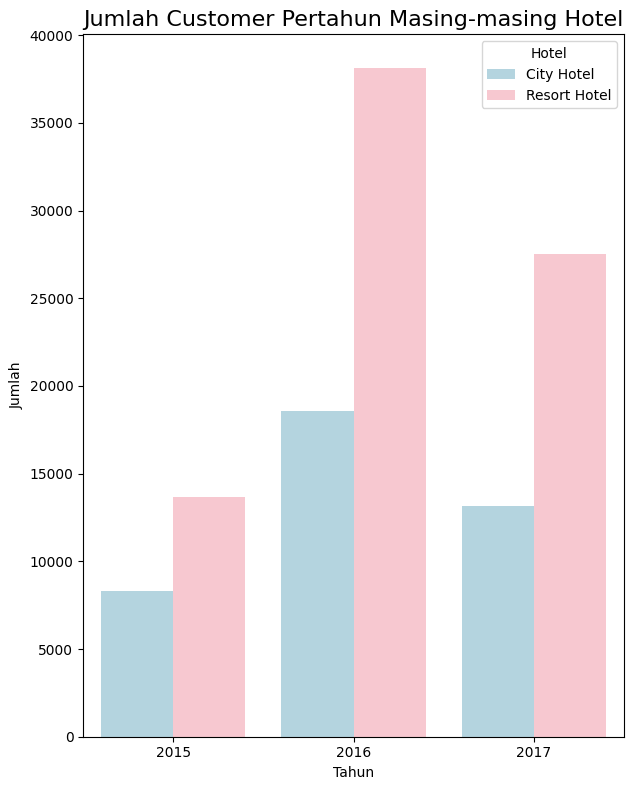

In [26]:
# Visualisasi barchart menggunakan data dari dataframe
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)

#Disini kita menggunakan data arrival date year sebagai variabel x dan variabel hotel sebagai hue supaya data tervisualisasi berdasarkan tipe hotel
sns.countplot(x='arrival_date_year', hue='hotel', data=df, palette=palette)
plt.title("Jumlah Customer Pertahun Masing-masing Hotel", size=16)

plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.legend(title="Hotel", loc="upper right", labels=['City Hotel', 'Resort Hotel'])

plt.tight_layout()
plt.show()


Pendapatan resort hotel selama tiga tahun berturut - turut lebih tinggi daripada city hotel dengan puncak tertingginya pada tahun 2016. Untuk mengetahui lebih lanjut, kita akan menganalisa tipe customer manakah yang paling banyak memberikan kontribusi terhadap pendapatan hotel. Supaya lebih rinci, kita akan melakukan analisa pada resort hotel terlebih dahulu.

In [27]:
customer_resort = df[df['hotel']=='Resort Hotel']

In [41]:
print(customer_resort['adr'].describe())

count    40060.000000
mean        94.952930
std         61.442418
min         -6.380000
25%         50.000000
50%         75.000000
75%        125.000000
max        508.000000
Name: adr, dtype: float64


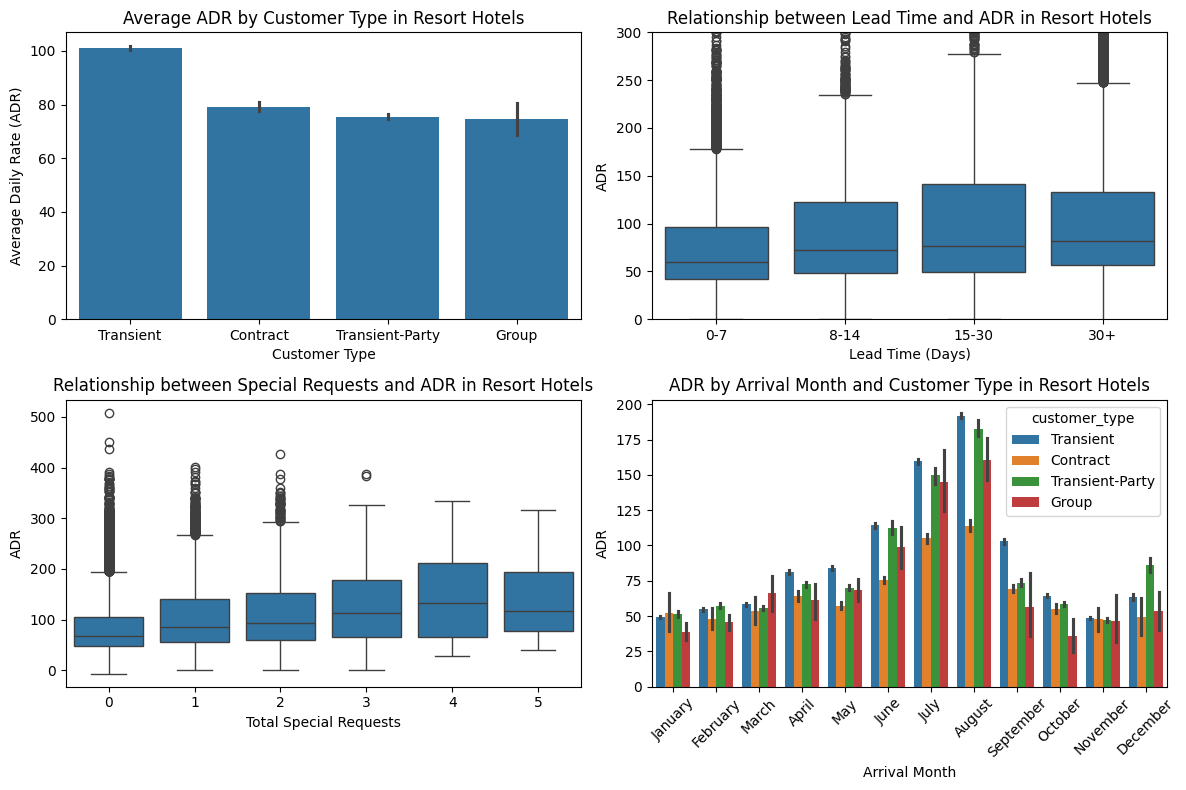

In [44]:
# Mengelompokkan data berdasarkan jenis pelanggan dan hitung ADR rata-rata untuk setiap jenis
customer_type_adr = customer_resort.groupby('customer_type')['adr'].mean().reset_index()

# Create bins for lead time
customer_resort['lead_time_bin'] = pd.cut(customer_resort['lead_time'], bins=[0, 7, 14, 30, np.inf], labels=['0-7', '8-14', '15-30', '30+'])

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Average ADR by Customer Type
sns.barplot(x='customer_type', y='adr', data=customer_resort, ax=axes[0, 0])
axes[0, 0].set_title('Average ADR by Customer Type in Resort Hotels')
axes[0, 0].set_xlabel('Customer Type')
axes[0, 0].set_ylabel('Average Daily Rate (ADR)')

# Plot 2: Relationship between Lead Time and ADR
sns.boxplot(x='lead_time_bin', y='adr', data=customer_resort, ax=axes[0, 1]) # Use customer_resort with lead_time_bin column
axes[0, 1].set_title('Relationship between Lead Time and ADR in Resort Hotels')
axes[0, 1].set_xlabel('Lead Time (Days)')
axes[0, 1].set_ylabel('ADR')
axes[0, 1].set_ylim(0, 300)

# Plot 3: Relationship between Special Requests and ADR
sns.boxplot(x='total_of_special_requests', y='adr', data=customer_resort,  ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Special Requests and ADR in Resort Hotels')
axes[1, 0].set_xlabel('Total Special Requests')
axes[1, 0].set_ylabel('ADR')
axes[0, 1].set_ylim(0, 300)

# Plot 4: ADR by Arrival Month and Customer Type
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
sns.barplot(x='arrival_date_month', y='adr', hue='customer_type', data=customer_resort, order=months_order, ax=axes[1, 1])
axes[1, 1].set_title('ADR by Arrival Month and Customer Type in Resort Hotels')
axes[1, 1].set_xlabel('Arrival Month')
axes[1, 1].set_ylabel('ADR')
axes[1, 1].tick_params(axis='x', rotation=45)

# Mengatur tata letak agar tidak saling bertumpuk
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

Berdasarkan analisis keempat grafik untuk Resort Hotels, dapat diidentifikasi beberapa pola yang berbeda dengan City Hotels. Pada grafik pertama, segmen Transient tetap mendominasi dengan ADR tertinggi, namun terdapat perbedaan yang lebih signifikan dengan segmen lainnya, dimana Contract menempati posisi kedua, diikuti Transient-Party dan Group. Analisis lead time pada grafik kedua menunjukkan tren peningkatan ADR seiring bertambahnya waktu pemesanan, dengan median ADR yang lebih tinggi pada pemesanan 15-30 hari dan 30+ hari sebelum kedatangan. Grafik ketiga memperlihatkan korelasi positif yang lebih kuat antara jumlah special request dengan ADR, dengan outlier yang mencapai ADR 500, mengindikasikan variasi harga yang lebih lebar di resort hotels. Sementara itu, pola seasonal pada grafik keempat menunjukkan perbedaan yang sangat signifikan, dimana puncak ADR terjadi pada periode Juli-Agustus dengan nilai hampir mencapai 200, jauh lebih tinggi dibanding bulan-bulan lainnya, hal ini mencerminkan karakteristik resort yang sangat dipengaruhi oleh musim liburan.

Selain melakukan analisa pada resort hotel, kita akan melakukan analisa pada city hotel

In [29]:
customer_city = df[df['hotel']=='City Hotel']

In [40]:
print(customer_city['adr'].describe())

count    79330.000000
mean       105.304465
std         43.602954
min          0.000000
25%         79.200000
50%         99.900000
75%        126.000000
max       5400.000000
Name: adr, dtype: float64


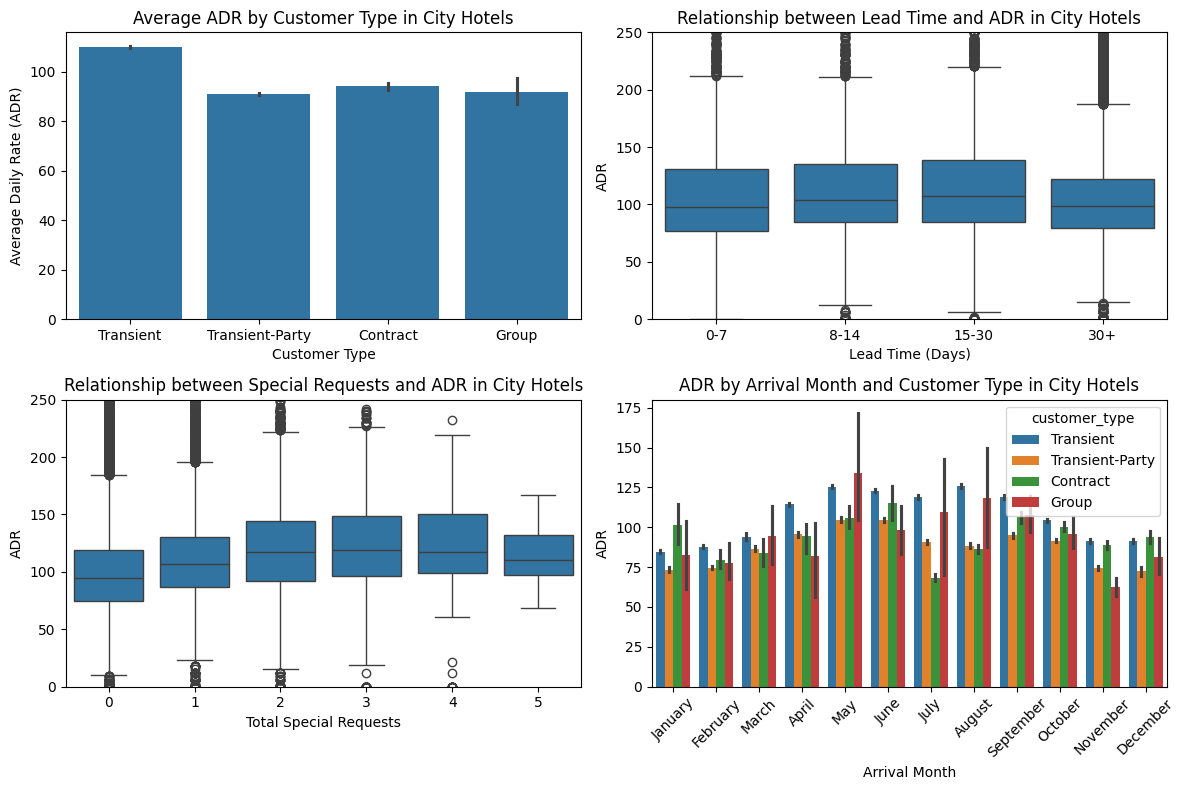

In [39]:
# Mengelompokkan data berdasarkan jenis pelanggan dan hitung ADR rata-rata untuk setiap jenis
customer_type_adr = customer_city.groupby('customer_type')['adr'].mean().reset_index()

# Create bins for lead time
customer_city['lead_time_bin_city'] = pd.cut(customer_city['lead_time'], bins=[0, 7, 14, 30, np.inf], labels=['0-7', '8-14', '15-30', '30+'])

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Average ADR by Customer Type
sns.barplot(x='customer_type', y='adr', data=customer_city, ax=axes[0, 0])
axes[0, 0].set_title('Average ADR by Customer Type in City Hotels')
axes[0, 0].set_xlabel('Customer Type')
axes[0, 0].set_ylabel('Average Daily Rate (ADR)')

# Plot 2: Relationship between Lead Time and ADR
sns.boxplot(x='lead_time_bin_city', y='adr', data=customer_city, ax=axes[0, 1])
axes[0, 1].set_title('Relationship between Lead Time and ADR in City Hotels')
axes[0, 1].set_xlabel('Lead Time (Days)')
axes[0, 1].set_ylabel('ADR')
axes[0, 1].set_ylim(0, 250)  # Membatasi y-axis sampai 250

# Plot 3: Relationship between Special Requests and ADR
sns.boxplot(x='total_of_special_requests', y='adr', data=customer_city, ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Special Requests and ADR in City Hotels')
axes[1, 0].set_xlabel('Total Special Requests')
axes[1, 0].set_ylabel('ADR')
axes[1, 0].set_ylim(0, 250)  # Membatasi y-axis sampai 250

# Plot 4: ADR by Arrival Month and Customer Type
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
sns.barplot(x='arrival_date_month', y='adr', hue='customer_type', data=customer_city, order=months_order, ax=axes[1, 1])
axes[1, 1].set_title('ADR by Arrival Month and Customer Type in City Hotels')
axes[1, 1].set_xlabel('Arrival Month')
axes[1, 1].set_ylabel('ADR')
axes[1, 1].tick_params(axis='x', rotation=45)

# Mengatur tata letak agar tidak saling bertumpuk
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

Berdasarkan analisis dari keempat grafik pada city hotel, dapat diidentifikasi beberapa pola signifikan dalam pengelolaan hotel. Grafik pertama menunjukkan bahwa segmen Transient memiliki ADR tertinggi dibandingkan segmen lainnya, mengindikasikan kontribusi pendapatan yang lebih substansial dari tamu individual. Analisis hubungan antara lead time dengan ADR pada grafik kedua menunjukkan distribusi yang relatif stabil, meskipun terdapat beberapa outlier yang mencapai ADR 250, menandakan adanya kasus-kasus khusus dalam penetapan harga. Selanjutnya, grafik ketiga memperlihatkan korelasi positif antara jumlah special request dengan ADR, dimana peningkatan jumlah permintaan khusus berbanding lurus dengan tingkat ADR - hal ini mengindikasikan hubungan antara ekspektasi layanan dengan kesediaan membayar dari tamu. Pada grafik terakhir, terlihat pola seasonal yang jelas dimana ADR mencapai puncaknya pada periode Mei hingga September, dengan segmen Transient secara konsisten mempertahankan posisi ADR tertinggi di hampir setiap bulan, memberikan implikasi penting untuk strategi penetapan harga dan manajemen pendapatan hotel.

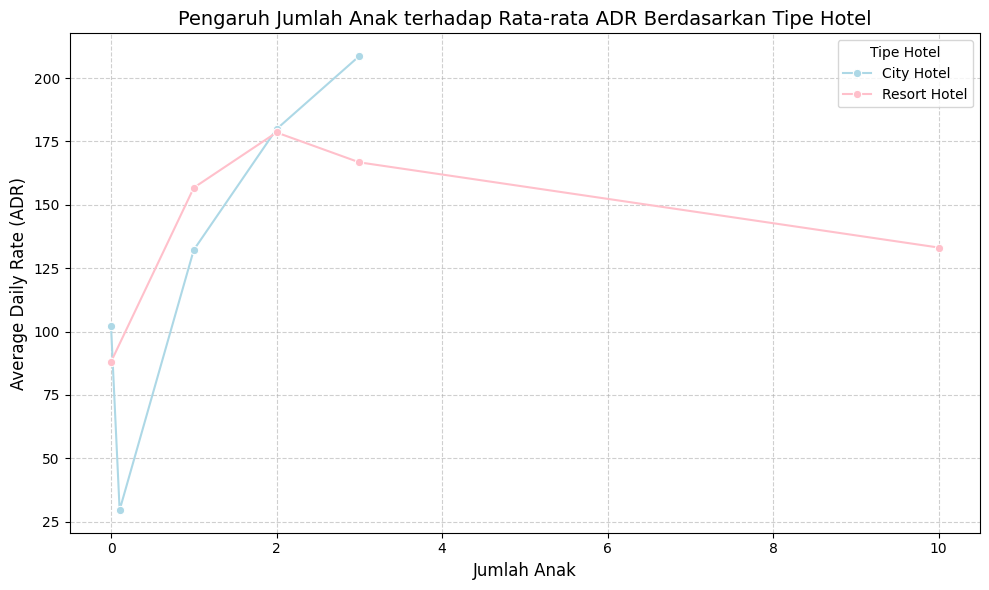

In [28]:
grouped_data = df.groupby(['children', 'hotel'])['adr'].mean().reset_index()
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=grouped_data,
    x='children',
    y='adr',
    hue='hotel',
    marker='o',
    palette=palette
)

plt.title('Pengaruh Jumlah Anak terhadap Rata-rata ADR Berdasarkan Tipe Hotel', fontsize=14)
plt.xlabel('Jumlah Anak', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.legend(title='Tipe Hotel', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Selain special requests yang dapat menambah pendapatan hotel, pelanggan yang membawa anak-anak juga akan memberikan kontribusi lebih terhadap pendapatan hotel.

## Kesimpulan Analisis Data

sy ngantuk

## Data Modelling

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_with_is_canceled = correlation_matrix[['is_canceled']]

plt.figure(figsize=(8, 10))
sns.heatmap(
    correlation_with_is_canceled,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True,
    linewidths=0.5
)
plt.tight_layout()
plt.show()


In [ ]:
drop_col = ['previous_bookings_not_canceled', 'arrival_date_year','country', 'required_car_parking_spaces','assigned_room_type', 'total_of_special_requests', 'agent', 'reservation_status','month']
df.drop(drop_col, axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
categorical_col = [col for col in df.columns if df[col].dtype in ['category', 'object', 'datetime']]
if 'reservation_status_date' in df.columns and 'reservation_status_date' not in categorical_col:
  categorical_col.append('reservation_status_date')
categorical_col

In [ ]:
cat_df = df[categorical_col]
cat_df.info()

In [ ]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [ ]:
cat_df.drop(['reservation_status_date', 'arrival_date_month'], axis = 1, inplace=True)

In [ ]:
cat_df.head()

In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

In [ ]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB' : 2, 'SC': 3, 'Undefined': 4})
cat_df['market_segment']= cat_df['market_segment'].map({'Direct': 0, 'Corporate' : 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5,
                                                        'Undefined': 6, 'Aviation': 7})
cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4})
cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C':0, 'A':1, 'D':2, 'E':3, 'G':4, 'F':5, 'H':6, 'L':7, 'P':8, 'B':9})
cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
cat_df['customer_type'] = cat_df['customer_type'].map({'Transient':0, 'Contract':1, 'Transient-Party':2, 'Group':3})
cat_df['year']=cat_df['year'].map({2015:0, 2014:1, 2016:2, 2017:3})

In [ ]:
cat_df.head()

In [ ]:
num_df = df.drop(columns = categorical_col, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

In [ ]:
num_df.var()

In [ ]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [ ]:
num_df.var()

In [ ]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [ ]:
num_df.head()

In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [ ]:
X.shape, y.shape

### Splitting Data

Membagi data dengan rasio 0.7

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

### CatBoost

In [ ]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

In [ ]:
print(f"Accuracy Score of CatBoost Classifier is : {acc_cat}")
print(f"Classification Report : \n{clf_report}")

### XGBoost

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

In [ ]:
print(f"Accuracy Score of XGBoost Classifier is : {acc_xgb}")
print(f"Classification Report : \n{clf_report}")

### KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

In [ ]:
print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Classification Report : \n{clf_report}")

In [ ]:
models = pd.DataFrame({'Model' : ['XGBoost', 'CatBoost', 'KNN'],
                      'Score': [acc_xgb, acc_cat, acc_knn]})

models.sort_values(by='Score', ascending=False)

In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', title = 'Models Comparison')

In [ ]:
!pip freeze > requirements.txt